In [54]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline 

#import machine learning libraries
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
Table=PrettyTable(['Algoritms','Accuracy'])

In [10]:
#import dataset
iris_data=pd.read_csv('C:/Users/TRACY WHITNEY/Desktop/kaggle datasets/iris dataset/IRIS.csv')

In [11]:
#to get a peak of our dataset 
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris_data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [14]:
#to get a summary of our dataset
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#  # Visualization of Data
  

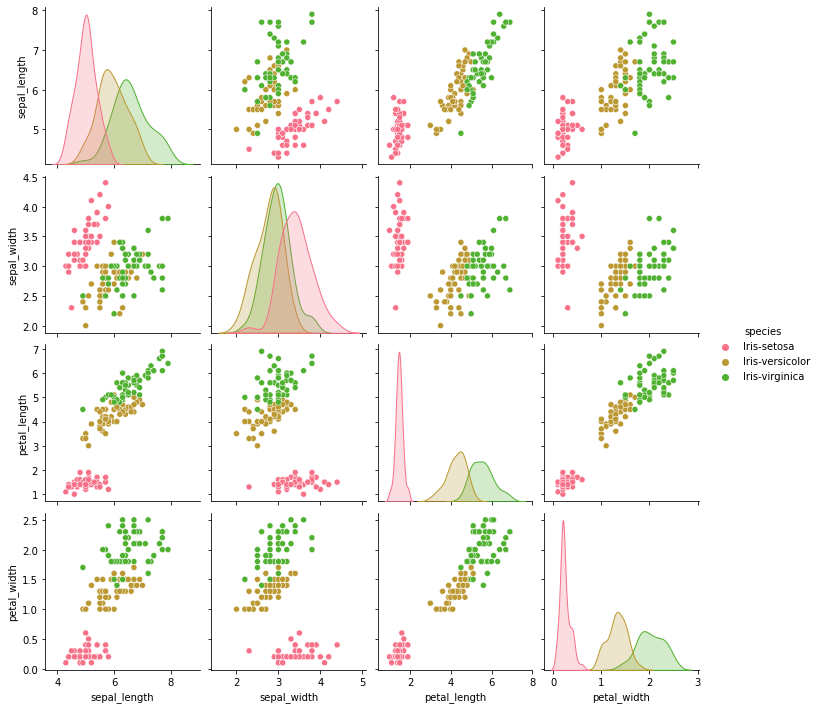

In [16]:
#We are going to use various plots to understand our data set and the relationship between the variables.
graph_1=sns.pairplot(iris_data,hue="species")
plt.show()

From the pairplot we can observe that their is a relationship between iris-setosa differs greatly from iris-veriscolor and irir-virginica species.

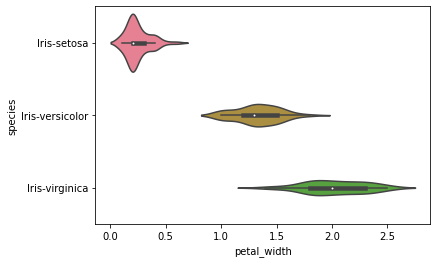

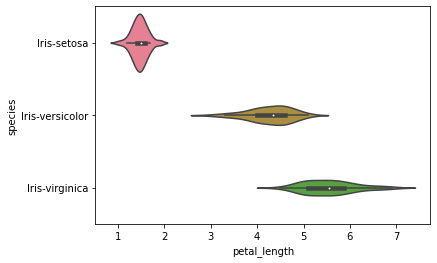

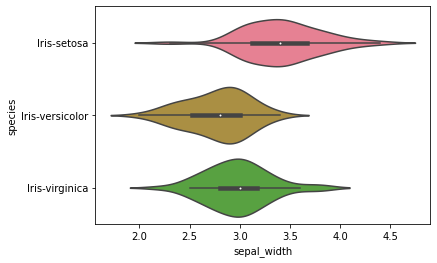

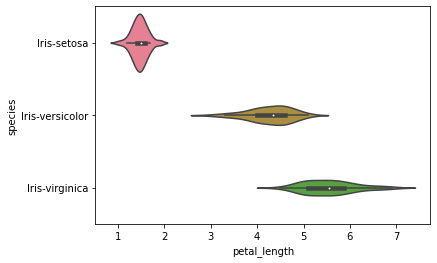

In [19]:
graph_2=sns.violinplot(y='species',x='petal_width',data=iris_data)
plt.show()
graph_2=sns.violinplot(y='species',x='petal_length',data=iris_data)
plt.show()
graph_3=sns.violinplot(y='species',x='sepal_width',data=iris_data)
plt.show()
graph_4=sns.violinplot(y='species',x='petal_length',data=iris_data)
plt.show()

There seems to be a relationship between irs-veriscolor and iris-virginica ,though overlapping.
Next, we are giong to use a heatmap to identify the correlation between petal length,sepal length,petal width and sepal width among the species.

<AxesSubplot:>

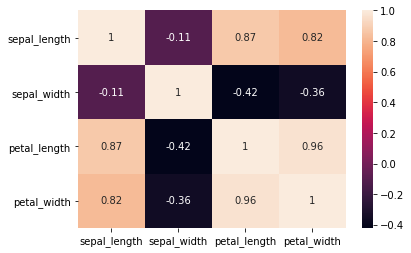

In [22]:
correlation=iris_data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

# Decision Trees

in this case we are going to use different models such as KNN,SVM,Random Forest,Naive Bayes and Logistic Regression to model and test and predict their accuracy.

In [23]:
x=iris_data.iloc[:,:4]
y=iris_data['species']
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [25]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(x,y)
y_pred=logreg.predict(x)
print(metrics.accuracy_score(y,y_pred))

0.9733333333333334


0.97 is known as the training accuracy.This means that 96% of our predictions are correct

We are going to train the model on the entire iris datset then test the model on the same dataset and evaluate how well we did by comparing the predicted response values with the true response values.


In [26]:
#KNN accuracy score(Train and testing the entire dataset)
knn=KNeighborsClassifier()
knn.fit(x,y)
y_pred=knn.predict(x)
print(metrics.accuracy_score(y,y_pred))

0.9666666666666667


In [45]:
#split the dataset in test and training set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.45,random_state=4)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_train.shape)

(82, 4) (82,)
(68, 4) (82,)


Test size at 0.45 means 45% observations are test set and 70% observations are training set

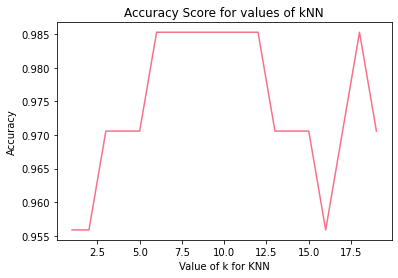

[0.9558823529411765, 0.9558823529411765, 0.9705882352941176, 0.9705882352941176, 0.9705882352941176, 0.9852941176470589, 0.9852941176470589, 0.9852941176470589, 0.9852941176470589, 0.9852941176470589, 0.9852941176470589, 0.9852941176470589, 0.9705882352941176, 0.9705882352941176, 0.9705882352941176, 0.9558823529411765, 0.9705882352941176, 0.9852941176470589, 0.9705882352941176]


In [55]:
#KNN
k_range=range(1, 20)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy')
plt.title('Accuracy Score for values of kNN')
plt.show()
print(scores)
Table.add_row(['KNN',(metrics.accuracy_score(y_test,y_pred))])

In [56]:
#Logistic Regression
y_pred=logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
Table.add_row(['Logistic Regression',(metrics.accuracy_score(y_test,y_pred))])

0.9705882352941176


In [57]:
#Naive Bayes
nv=GaussianNB()
nv.fit(x_train,y_train)
y_pred=nv.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
Table.add_row(['Naive Bayes',(metrics.accuracy_score(y_test,y_pred))])

0.9558823529411765


In [58]:
#SVM
sv=svm.SVC()
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
Table.add_row(['SVM',(metrics.accuracy_score(y_test,y_pred))])

0.9705882352941176


In [59]:
#RandomForest
rdm=RandomForestClassifier(n_estimators=14)
rdm.fit(x_train,y_train)
y_pred=rdm.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))
Table.add_row(['Random Forest',(metrics.accuracy_score(y_test,y_pred))])

0.9411764705882353


In [60]:
print(Table)

+---------------------+--------------------+
|      Algoritms      |      Accuracy      |
+---------------------+--------------------+
|         KNN         | 0.9705882352941176 |
| Logistic Regression | 0.9705882352941176 |
|     Naive Bayes     | 0.9558823529411765 |
|         SVM         | 0.9705882352941176 |
|    Random Forest    | 0.9411764705882353 |
+---------------------+--------------------+
